<a href="https://colab.research.google.com/github/frankausberlin/notebook-collection/blob/main/openainotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [OpenAI](https://platform.openai.com/) [API](https://platform.openai.com/docs/introduction)

* This notebook is my [rubber duck](https://en.wikipedia.org/wiki/Rubber_duck_debugging) for the OpenAI stuff and you should use it with google colab.
* It contains the DLAI [prompt engineering course](https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/) - currently free (06/05/2023) for a limited time.
* For this notebook you need a personal api key ([pricing](https://openai.com/pricing)) - not for the course.
* You can get the api key [here](https://platform.openai.com/account/api-keys). You can control your usage [here](https://platform.openai.com/account/usage).
* There is a limit of $120 per month - you can manage limitations [here](https://platform.openai.com/account/billing/limits).
* You can choose from many [models](https://platform.openai.com/docs/models) and there is a community [here](https://community.deeplearning.ai/).





In [1]:
#@markdown **setup** (api key [here](https://platform.openai.com/account/api-keys))<br><font size='+1' color='purple'>Copy and paste your key in the input field.</font>
#myApiKey = 'sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

try:
  import openai
except ModuleNotFoundError:
  print ('Installing openai')
  !pip install -q openai

  import                                openai
import                                  os, getpass
from ipywidgets import                  Dropdown, HTML, FloatSlider

try:
  os.environ["OPENAI_API_KEY"] = openai.api_key = myApiKey
except:
  os.environ["OPENAI_API_KEY"] = openai.api_key = getpass.getpass (prompt='Your API key: ')

def get_completion(prompt, model=None,temperature=None):
  if not model:         model         = default_model
  if not temperature:   temperature   = default_temperature
  messages = [{"role": "user", "content": prompt}]
  try:
    response = openai.ChatCompletion.create(model=model, messages=messages, temperature=temperature)
    return response.choices[0].message["content"]
  except:
    return 'oops - something goes wrong...'

display(HTML("""<font size='+2' color='green'>Set API-Key done!</font>"""))



Your API key: ··········


HTML(value="<font size='+2' color='green'>Set API-Key done!</font>")

In [30]:
#@title simple chat
import openai
from ipywidgets import VBox, Tab, Textarea, Button, Layout, Dropdown, HBox, Text

def get_completion_from_messages (messages, model="gpt-3.5-turbo", temperature=0):
  return openai.ChatCompletion.create  ( model=model, messages=messages, temperature=temperature)

bu_send    = Button   (description='>>',layout=Layout(width='60px'),style={'button_color':'lightgreen'})
ly_main    = Layout   (width='auto', height='65px')
ta_system  = Textarea (description='system:', value='You are a friendly assistant and you answer in german.', layout=ly_main)
ta_user    = Textarea (description='user:', value='tell a joke', layout=ly_main)
vb_main    = VBox     (children=[ta_system,ta_user], layout=Layout(width='1200px'))
hb_config  = HBox     ([Dropdown (description='model:', options=['gpt-3.5-turbo','gpt-4']),
                        Text     (description='temperature', value='0.2', layout=Layout(width='140px')) ])
hm_waiter  = HTML     ('',layout=Layout(width='200px'))
hb_control = HBox     ([bu_send,hm_waiter],layout=Layout(width='auto'))

messages=[]
def send_click (b):
  global messages, hm_waiter
  hm_waiter.value = """<marquee style='width: 100%; color: blue;'>waiting for response...</marquee>"""
  messages = [{'role':'system', 'content':f'{vb_main.children[0].value}'}]
  for n,ta in enumerate(vb_main.children[1:]):
    ta.layout = ly_main
    messages.append ({'role':'assistant' if n%2 else 'user', 'content':f'{ta.value}'})
  response          = get_completion_from_messages (messages,
                                                    model       = hb_config.children[0].value,
                                                    temperature = float(hb_config.children[1].value)
                                                   ).choices[0]['message']['content']
  ta_assist         = Textarea (description='assistant:', value=response, layout=Layout(width='auto',height='400px'))
  ta_user           = Textarea (description='user:', value='', layout=ly_main)
  vb_main.children  = [*vb_main.children,ta_assist,ta_user]
  hm_waiter.value   = ''
bu_send.on_click(send_click)

display(hb_config)
display(vb_main)
display(hb_control)


# [OpenAI Models](https://platform.openai.com/docs/models)

There is a good [post](https://community.openai.com/t/what-do-all-these-models-do/19007) in the openAI forum.

<blockquote>
quote

---

* **Ada**, **Babbage**, **Curie**, **Cushman** and **Davinci** are different models doing the same, but having different size. The model with a higher size tends to give better results, but has a higher price and takes more time to give result (because it requires more computation). Davinci is the model with the biggest size.

* The models that have **“code”** in the name are part of “Codex” - they serve the purpose of generating code.

* The models that have **“text”** in the name serve the purpose of generating plain text (that’s their primary purpose, but they can also generate code to a small extent).

* The models that have **“search”** or **“similarity”** in name are for **“embeddings”** - they serve the purpose of finding similar texts (as described in the documentation under “embeddings”).

* The models that have **“search-code”** in the name are for searching with “code”, **“search-text”** is for searching with text. The models that have “search” in the name, but not “code” are for searching text (“document” is for specyifing the documents among which you search, “query” is for the query by which you search). **“similarity”** is for finding similar documents as well, but there’s some difference between “search” and “similarity”. From what I’ve remember it’s mostly about the length of the searched documents.

* The models with **“edit”** are for editing code or text (as opposed to completing it).

* The models with **“instruct”** are the models trained specifically for being able to deal with the input (prompt) in a form or instructions.

* The models with **“insert”** are for insertions (you pass [insert] in the prompt and it generates text/code in the middle of the prompt, in place where you put “insert”, instead of generating at the end).

* **“001”**, **“002”** are different versions. I assume “002” are better than “001” becuase 002 is an improved version of 001.

* I don’t know what the models with “if” are.

---

</blockquote>



In [ ]:
#@markdown **openAI.Model**
#@markdown * This little snippet uses the class ```openai.Model``` to get the actual model list.
#@markdown * It create a tab for every model base with all associated model ids.
#@markdown * Youn can select the model-id to view the string representation with all parameters.
from ipywidgets import Tab, HBox, RadioButtons, Textarea, Layout

# create dict with base name as key and the associated models list as value
ML = openai.Model.list()['data']
ids, models = [item['id'] for item in ML], {}
for all in set ([id.split('-')[0].split(':')[0] for id in ids]):
  models[all] = [model for model in ids if all == model.split('-')[0].split(':')[0]]

# little helper
def model_by_id (id):
  return 'None' if not id in [i['id'] for i in ML] else str([all for all in ML if all['id'] == id][0])
def some_change (c):
  selectedBox   = tab.children[tab.selected_index]
  tmpRB, tmpTA  = selectedBox.children[0], selectedBox.children[1]
  tmpTA.value   = model_by_id (tmpRB.value)

# create tab for every model base
tab = Tab (children=[HBox() for all in models])

# fill tabs
for i, title in enumerate(models):
  tmpRB         = RadioButtons  (options=[id for id in models[title]])
  tmpRB         .observe        (some_change, names=['value'])
  tmpTA         = Textarea      (layout=Layout(width='600px',height='500px'))
  tmpTA.value   = model_by_id   (tmpRB.value)

  tab.children[i].children = [tmpRB,tmpTA]
  tab.set_title (i,title)

print (f'Models total: {len(ML)}')
display (tab)



Models total: 56


# Mini course from [DeepLearning.ai](https://www.deeplearning.ai/) for the [OpenAI platform](https://platform.openai.com/)
* It contains the DLAI prompt engineering course and you should use it with google colab.
* The [course](https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/) is currently free (06/05/2023) for a limited time.







## [Guidelines for Prompting](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/2/guidelines)

In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

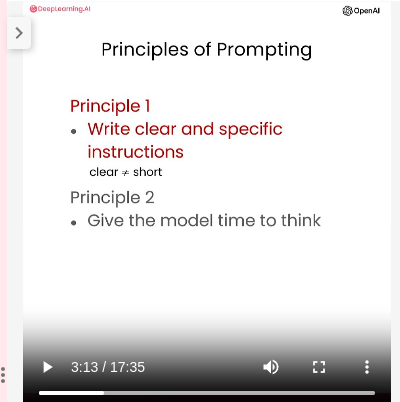

In [ ]:
#@markdown <font size='+1'><b>Principle 1: Write clear and specific instructions
text = """
See also: History of artificial intelligence § Perceptrons and the attack on connectionism, and AI winter § The abandonment of connectionism in 1969
The perceptron was invented in 1943 by Warren McCulloch and Walter Pitts.[3] The first implementation was a machine built in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt,[4] funded by the United States Office of Naval Research.[5]

In a 1958 press conference organized by the US Navy, Rosenblatt made statements about the perceptron that caused a heated controversy among the fledgling AI community; based on Rosenblatt's statements, The New York Times reported the perceptron to be "the embryo of an electronic computer that [the Navy] expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence."[5]

Although the perceptron initially seemed promising, it was quickly proved that perceptrons could not be trained to recognise many classes of patterns. This caused the field of neural network research to stagnate for many years, before it was recognised that a feedforward neural network with two or more layers (also called a multilayer perceptron) had greater processing power than perceptrons with one layer (also called a single-layer perceptron).

Single-layer perceptrons are only capable of learning linearly separable patterns.[6] For a classification task with some step activation function, a single node will have a single line dividing the data points forming the patterns. More nodes can create more dividing lines, but those lines must somehow be combined to form more complex classifications. A second layer of perceptrons, or even linear nodes, are sufficient to solve many otherwise non-separable problems.

In 1969, a famous book entitled Perceptrons by Marvin Minsky and Seymour Papert showed that it was impossible for these classes of network to learn an XOR function. It is often believed (incorrectly) that they also conjectured that a similar result would hold for a multi-layer perceptron network. However, this is not true, as both Minsky and Papert already knew that multi-layer perceptrons were capable of producing an XOR function. (See the page on Perceptrons (book) for more information.) Nevertheless, the often-miscited Minsky/Papert text caused a significant decline in interest and funding of neural network research. It took ten more years until neural network research experienced a resurgence in the 1980s.[6] This text was reprinted in 1987 as "Perceptrons - Expanded Edition" where some errors in the original text are shown and corrected.

A 2022 article states that the Mark 1 Perceptron was "part of a previously secret four-year NPIC [the US' National Photographic Interpretation Center] effort from 1963 through 1966 to develop this algorithm into a useful tool for photo-interpreters".[7]

The kernel perceptron algorithm was already introduced in 1964 by Aizerman et al.[8] Margin bounds guarantees were given for the Perceptron algorithm in the general non-separable case first by Freund and Schapire (1998),[1] and more recently by Mohri and Rostamizadeh (2013) who extend previous results and give new L1 bounds.[9]

The perceptron is a simplified model of a biological neuron. While the complexity of biological neuron models is often required to fully understand neural behavior, research suggests a perceptron-like linear model can produce some behavior seen in real neurons.[10]
"""

prompt = f"""
Im folgenden befindet sich in den beiden Zeichenfolgen 'irgendwaseindeutiges' eingeschlossen ein Text.
Erstelle hintereinander:

1. Eine kurze Zusammenfassung in zwei Sätzen über den Inhalt des Textes.
2. Erzeuge eine Auflistung der wichtigsten themen oder inhalte in Form einer Schlagwortliste wie folgt:

Thema A: Schlagwort
- kurze Erleuterung (1 Satzt)

Thema B: Schlagwort
- kurze Erleuterung (1 Satzt)
...
Thema N: Schlagwort
- kurze Erleuterung (1 Satzt)

3. Ein kurzes Resume mit einer Bewertung des Textes.

'irgendwaseindeutiges'
{text}
'irgendwaseindeutiges'
"""


response = get_completion(prompt)
print (response)


1. Der Text beschäftigt sich mit der Geschichte des Perceptrons, einem Modell eines biologischen Neurons, das in der künstlichen Intelligenz eingesetzt wurde. Es wird aufgezeigt, wie das Perceptron zunächst vielversprechend schien, aber schnell seine Grenzen zeigte und wie es schließlich durch die Entwicklung von mehrschichtigen Perceptrons und anderen neuronalen Netzwerken überwunden wurde.

2. 
Thema A: Perceptron
- Ein Modell eines biologischen Neurons, das in der künstlichen Intelligenz eingesetzt wurde.
Thema B: Geschichte
- Die Entwicklung und Geschichte des Perceptrons in der künstlichen Intelligenz.
Thema C: Grenzen
- Die Grenzen des Perceptrons und wie es durch die Entwicklung von mehrschichtigen Perceptrons und anderen neuronalen Netzwerken überwunden wurde.
Thema D: Kontroverse
- Die Kontroverse um das Perceptron in der künstlichen Intelligenz-Community in den 1950er Jahren.

3. Der Text gibt einen interessanten Einblick in die Geschichte des Perceptrons und zeigt auf, wie e

In [ ]:
#@markdown **Tactic 1**:<br>Use delimiters to clearly indicate distinct parts of the input. Delimiters can be anything like: ```, """, < >, , :
import textwrap

text = f"""
You should express what you want a model to do by \
providing instructions that are as clear and \
specific as you can possibly make them. \
This will guide the model towards the desired output, \
and reduce the chances of receiving irrelevant \
or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. \
In many cases, longer prompts provide more clarity \
and context for the model, which can lead to \
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print ( *textwrap.TextWrapper(width=120).wrap(response), sep='\\\n' )


Clear and specific instructions should be provided to guide a model towards the desired output, and longer prompts can\
provide more clarity and context for the model, leading to more detailed and relevant outputs.


In [ ]:
#@markdown **Tactic 2**:<br>Ask for a structured output (html, json ...)

prompt = f"""
Generate a list of three made-up book titles along \
with their authors and genres.
Provide them in JSON format with the following keys:
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

[
  {
    "book_id": 1,
    "title": "The Lost City of Zorath",
    "author": "Aria Blackwood",
    "genre": "Fantasy"
  },
  {
    "book_id": 2,
    "title": "The Last Survivors",
    "author": "Ethan Stone",
    "genre": "Science Fiction"
  },
  {
    "book_id": 3,
    "title": "The Secret of the Haunted Mansion",
    "author": "Lila Rose",
    "genre": "Mystery"
  }
]


In [ ]:
#@markdown **Tactic 3**:<br>Ask the model to check whether conditions are satisfied
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \
water boiling. While that's happening, \
grab a cup and put a tea bag in it. Once the water is \
hot enough, just pour it over the tea bag. \
Let it sit for a bit so the tea can steep. After a \
few minutes, take out the tea bag. If you \
like, you can add some sugar or milk to taste. \
And that's it! You've got yourself a delicious \
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)
print('-------------------------------')

text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \
walk in the park. The flowers are blooming, and the \
trees are swaying gently in the breeze. People \
are out and about, enjoying the lovely weather. \
Some are having picnics, while others are playing \
games or simply relaxing on the grass. It's a \
perfect day to spend time outdoors and appreciate the \
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, \
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 1:
Step 1 - Get some water boiling.
Step 2 - Grab a cup and put a tea bag in it.
Step 3 - Once the water is hot enough, pour it over the tea bag.
Step 4 - Let it sit for a bit so the tea can steep.
Step 5 - After a few minutes, take out the tea bag.
Step 6 - Add some sugar or milk to taste.
Step 7 - Enjoy your delicious cup of tea!


-------------------------------
Completion for Text 2:
No steps provided.


In [ ]:
#@markdown **Tactic 4**:<br>"Few-shot" prompting
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \
valley flows from a modest spring; the \
grandest symphony originates from a single note; \
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print ( *textwrap.TextWrapper(width=120).wrap(response), sep='\\\n' )

<grandparent>: Resilience is like a tree that bends with the wind but never breaks. It is the ability to bounce back\
from adversity and keep moving forward, even when things get tough. Just like a tree that grows stronger with each storm\
it weathers, resilience is a quality that can be developed and strengthened over time.


In [ ]:
#@markdown <font size='+1'><b>Principle 2: Give the model time to “think”<br><br><b>Tactic 1</b>:<br>Specify the steps required to complete a task

text = f"""
In a charming village, siblings Jack and Jill set out on \
a quest to fetch water from a hilltop \
well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled \
down the hill, with Jill following suit. \
Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, \
their adventurous spirits remained undimmed, and they \
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions:
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into German.
3 - List each name in the German summary.
4 - Output a json object that contains the following \
keys: german_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
Two siblings, Jack and Jill, go on a quest to fetch water from a well on a hilltop, but misfortune strikes and they both tumble down the hill, returning home slightly battered but with their adventurous spirits undimmed.

Zwei Geschwister, Jack und Jill, machen sich auf die Suche nach Wasser aus einem Brunnen auf einem Hügel, aber ein Missgeschick führt dazu, dass sie beide den Hügel hinunterstürzen und leicht verletzt nach Hause zurückkehren, aber ihre abenteuerlustigen Geister bleiben ungetrübt. 

Jack, Jill. 

{
  "german_summary": "Zwei Geschwister, Jack und Jill, machen sich auf die Suche nach Wasser aus einem Brunnen auf einem Hügel, aber ein Missgeschick führt dazu, dass sie beide den Hügel hinunterstürzen und leicht verletzt nach Hause zurückkehren, aber ihre abenteuerlustigen Geister bleiben ungetrübt.",
  "num_names": 2
}


In [ ]:
#@markdown variation:<br>output in a specified format
prompt_2 = f"""
Your task is to perform the following actions:
1 - Summarize the following text delimited by
  <> with 1 sentence.
2 - Translate the summary into German.
3 - List each name in the German summary.
4 - Output a json object that contains the
  following keys: german_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in German summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Jack and Jill go on a quest to fetch water, but misfortune strikes and they tumble down a hill, returning home slightly battered but with undimmed adventurous spirits.
Translation: Jack und Jill machen sich auf die Suche nach Wasser, aber ein Missgeschick führt dazu, dass sie den Hügel hinunterstürzen und leicht verletzt nach Hause zurückkehren, jedoch mit ungetrübtem Abenteuergeist.
Names: Jack, Jill
Output JSON: {"german_summary": "Jack und Jill machen sich auf die Suche nach Wasser, aber ein Missgeschick führt dazu, dass sie den Hügel hinunterstürzen und leicht verletzt nach Hause zurückkehren, jedoch mit ungetrübtem Abenteuergeist.", "num_names": 2}


In [ ]:
#@markdown **Tactic 2**:<br>Instruct the model to work out its own solution before rushing to a conclusion
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct.


In [ ]:
#@markdown Note that the student's solution is actually **not correct**.<br>We can fix this by instructing the model to work out its own solution first.
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem.
- Then compare your solution to the student's solution \
and evaluate if the student's solution is correct or not.
Don't decide if the student's solution is correct until
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials.
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
```
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

Let x be the size of the installation in square feet.

Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 10x

Total cost: 100x + 250x + 100,000 + 10x = 360x + 100,000

Is the student's solution the same as actual solution just calculated:
No

Student grade:
Incorrect


In [ ]:
#@markdown <font size='+1'>Model Limitations: **Hallucinations**</font><br>Boie is a real company, the product name is not real.

prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a high-tech toothbrush that uses advanced sonic technology to provide a deep and thorough clean. It features a slim and sleek design that makes it easy to hold and maneuver, and it comes with a range of smart features that help you optimize your brushing routine.

One of the key features of the AeroGlide UltraSlim Smart Toothbrush is its advanced sonic technology, which uses high-frequency vibrations to break up plaque and bacteria on your teeth and gums. This technology is highly effective at removing even the toughest stains and buildup, leaving your teeth feeling clean and refreshed.

In addition to its sonic technology, the AeroGlide UltraSlim Smart Toothbrush also comes with a range of smart features that help you optimize your brushing routine. These include a built-in timer that ensures you brush for the recommended two minutes, as well as a pressure sensor that alerts you if you're brushing too hard.

Overall, the AeroGlide Ul

## [Iterative Prompt Develelopment](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/3/iterative)

In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

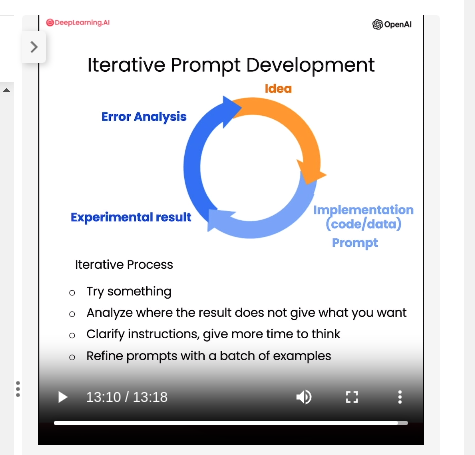

In [ ]:
#@markdown **Example**: Generate a marketing product description from a product fact sheet<br>

fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture,
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100)
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black,
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities:
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. Part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, this chair is available in several options of shell color and base finishes to suit your style. Choose from plastic back and front upholstery (SWC-100) or full upholstery (SWC-110) in 10 fabric and 6 leather options.

The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. It is available with or without armrests and is qualified for contract use. The base finish options are stainless steel, matte black, gloss white, or chrome.

Measuring at a width of 53 cm, depth of 51 cm, and height of 80 cm, with a seat height of 44 cm and seat depth of 41 cm, this chair is designed for ultimate comfort. You can also choose between soft or hard-floor caster options and two choices of seat fo

In [ ]:
#@markdown **Issue 1**:<br>The text is too long -> Limit the number of words/sentences/characters.

prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our mid-century inspired office chair, perfect for home or business settings. Available in a range of shell colors and base finishes, with or without armrests. Choose from 10 fabric and 6 leather options for full or plastic upholstery. With a 5-wheel base and pneumatic chair adjust, it's both stylish and functional. Made in Italy.


In [ ]:
#@markdown **Issue 2**:<br>Text focuses on the wrong details -> Ask it to focus on the aspects that are relevant to the intended audience.

prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)
print('-----------------')

prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, perfect for both home and business settings. With a range of shell colors and base finishes, including stainless steel and matte black, this chair is available with or without armrests. The 5-wheel plastic coated aluminum base and pneumatic chair adjust make it easy to move and adjust to your desired height. Made with high-quality materials, including a cast aluminum shell and HD36 foam seat, this chair is built to last.
-----------------
Introducing our mid-century inspired office chair, perfect for home or business settings. With a range of shell colors and base finishes, and the option of plastic or full upholstery, this chair is both stylish and comfortable. Constructed with a 5-wheel plastic coated aluminum base and pneumatic chair adjust, it's also practical. Available with or without armrests and suitable for contract use. Product ID: SWC-100, SWC-110.


In [ ]:
#@markdown **Issue 2**:<br>Description needs a table of dimensions -> Ask it to extract information and organize it in a table.

prompt = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

The description is intended for furniture retailers,
so should be technical in nature and focus on the
materials the product is constructed from.

At the end of the description, include every 7-character
Product ID in the technical specification.

After the description, include a table that gives the
product's dimensions. The table should have two columns.
In the first column include the name of the dimension.
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website.
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)

from IPython.display import display, HTML
display(HTML(response))


Dimension Name,Measurement (inches)
Width,"20.87"""
Depth,"20.08"""
Height,"31.50"""
Seat Height,"17.32"""
Seat Depth,"16.14"""


## [Summarizing](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/4/summarizing)

In this lesson, you will summarize text with a focus on specific topics.

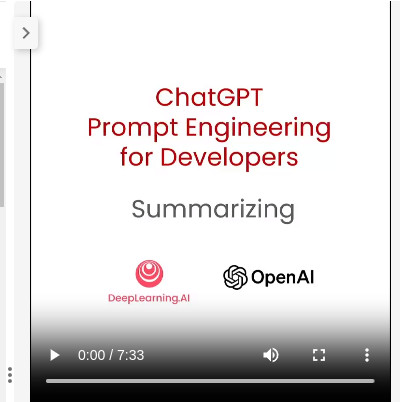

In [ ]:
#@markdown Summarize with a limit (word/sentence/character)
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \
super cute, and its face has a friendly look. It's \
a bit small for what I paid though. I think there \
might be other options that are bigger for the \
same price. It arrived a day earlier than expected, \
so I got to play with it myself before I gave it \
to her.
"""

prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site.

Summarize the review below, delimited by triple
backticks, in at most 30 words.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early.


In [ ]:
#@markdown Summarize with a focus on shipping and delivery

prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment.

Summarize the review below, delimited by triple
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The panda plush toy arrived a day earlier than expected, but the customer felt it was a bit small for the price paid.


In [ ]:
#@markdown Summarize with a focus on price and value

prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.

Summarize the review below, delimited by triple
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The panda plush toy is soft, cute, and loved by the recipient, but the price may be too high for its size.


In [ ]:
#@markdown Try "extract" instead of "summarize"

prompt = f"""
Your task is to extract relevant information from \
a product review from an ecommerce site to give \
feedback to the Shipping department.

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \
delivery. Limit to 30 words.

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The product arrived a day earlier than expected.


In [ ]:
#@markdown Summarize multiple product reviews

review_1 = prod_review

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products.
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean!
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]

for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \
    review from an ecommerce site.

    Summarize the review below, delimited by triple \
    backticks in at most 20 words.

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")

0 Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early. 

1 Affordable lamp with storage, fast shipping, and excellent customer service. Easy to assemble and missing parts were quickly replaced. 

2 Good battery life, small toothbrush head, but effective cleaning. Good deal if bought around $50. 

3 The product was on sale for $49 in November, but the price increased to $70-$89 in December. The base doesn't look as good as previous editions, but the reviewer plans to be gentle with it. A special tip for making smoothies is to freeze the fruits and vegetables beforehand. The motor made a funny noise after a year, and the warranty had expired. Overall quality has decreased. 



## [Inferring](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/5/inferring)

In this lesson, you will infer sentiment and topics from product reviews and news articles.

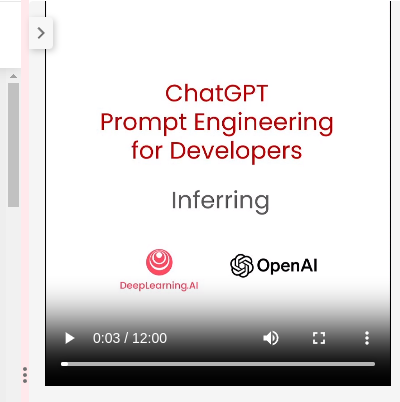

In [ ]:
#@markdown Sentiment (positive/negative)

lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

prompt = f"""
What is the sentiment of the following product review,
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)
print ('---------------')

prompt = f"""
What is the sentiment of the following product review,
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.
---------------
positive


In [ ]:
#@markdown Identify types of emotions

prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

happy, satisfied, grateful, impressed, content


In [ ]:
#@markdown Identify anger

prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


In [ ]:
#@markdown Extract product and company name from customer reviews

prompt = f"""
Identify the following items from the review text:
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


In [ ]:
#@markdown Doing multiple tasks at once

prompt = f"""
Identify the following items from the review text:
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp with additional storage",
  "Brand": "Lumina"
}


In [ ]:
#@markdown Infer 5 topics

story = """
In a recent survey conducted by the government,
public sector employees were asked to rate their level
of satisfaction with the department they work at.
The results revealed that NASA was the most popular
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings,
stating, "I'm not surprised that NASA came out on top.
It's a great place to work with amazing people and
incredible opportunities. I'm proud to be a part of
such an innovative organization."

The results were also welcomed by NASA's management team,
with Director Tom Johnson stating, "We are thrilled to
hear that our employees are satisfied with their work at NASA.
We have a talented and dedicated team who work tirelessly
to achieve our goals, and it's fantastic to see that their
hard work is paying off."

The survey also revealed that the
Social Security Administration had the lowest satisfaction
rating, with only 45% of employees indicating they were
satisfied with their job. The government has pledged to
address the concerns raised by employees in the survey and
work towards improving job satisfaction across all departments.
"""

prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long.

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)
print ('------------------------')
response.split(sep=',')


government survey, job satisfaction, NASA, Social Security Administration, employee concerns
------------------------


['government survey',
 ' job satisfaction',
 ' NASA',
 ' Social Security Administration',
 ' employee concerns']

In [ ]:
#@markdown Make a news alert for certain topics

topic_list = [
    "nasa", "local government", "engineering",
    "employee satisfaction", "federal government"
]

prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)
print('-----------------')
topic_dict = {i.split(': ')[0]: int(i.split(': ')[1]) for i in response.split(sep='\n')}
topic_dict

nasa: 1
local government: 0
engineering: 0
employee satisfaction: 1
federal government: 1
-----------------


{'nasa': 1,
 'local government': 0,
 'engineering': 0,
 'employee satisfaction': 1,
 'federal government': 1}

## [Transforming](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/6/transforming)

In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.

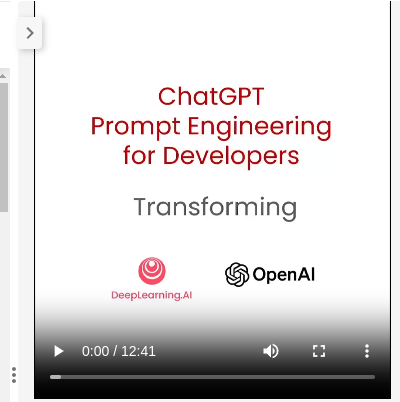


In [ ]:
#@markdown Translation<br>ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

prompt = f"""
Translate the following English text to Spanish: \
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)
print ('-----------------')

prompt = f"""
Tell me which language this is:
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)
print ('-----------------')

prompt = f"""
Translate the following  text to French and Spanish
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)
print ('-----------------')

prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms:
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)



Hola, me gustaría ordenar una licuadora.
-----------------
This is French.
-----------------
French pirate: ```Je veux commander un ballon de basket```
Spanish pirate: ```Quiero pedir una pelota de baloncesto```
English pirate: ```I want to order a basketball```
-----------------
Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


In [ ]:
#@markdown Universal Translator<br>Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
]

for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")


Original message (This is French.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.
Korean: 시스템 성능이 평소보다 느립니다. 

Original message (This is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: My monitor has pixels that don't light up.
Korean: 내 모니터에는 불이 켜지지 않는 픽셀이 있습니다. 

Original message (This is Italian.): Il mio mouse non funziona
English: My mouse is not working.
Korean: 내 마우스가 작동하지 않습니다. 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken.
Korean: 제 Ctrl 키가 고장 났어요. 

Original message (This is Chinese (Simplified).): 我的屏幕在闪烁
English: My screen is flickering.
Korean: 내 화면이 깜빡입니다. 



In [ ]:
#@markdown Tone Transformation<br>Writing can vary based on the intended audience. ChatGPT can produce different tones.

prompt = f"""
Translate the following from slang to a business letter:
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)


Dear Sir/Madam,

I am writing to bring to your attention a standing lamp that I believe may be of interest to you. Please find attached the specifications for your review.

Thank you for your time and consideration.

Sincerely,

Joe


In [ ]:
#@markdown Format Conversion<br>ChatGPT can translate between formats. The prompt should describe the input and output formats.

data_json = { "resturant employees" :[
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
#print(response)

from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


In [ ]:
#@markdown Spellcheck/Grammar check.<br>Here are some examples of common grammar and spelling problems and the LLM's response.<br>To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

text = [
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)
print ('-----------------')


text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

# print ('-----------------')
# from redlines import Redlines
# diff = Redlines(text,response)
# display(Markdown(diff.output_markdown))

print ('-----------------')
prompt = f"""
proofread and correct this review. Make it more compelling.
Ensure it follows APA style guide and targets an advanced reader.
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?
Their goes my freedom. There going to bring they're suitcases.

Corrected version: 
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
This phrase is to check ChatGPT for spelling ability.
-----------------
I got this for my daughter's birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave

Title: A Soft and Cute Panda Plush Toy for All Ages

Introduction:
As a parent, finding the perfect gift for your child's birthday can be a daunting task. However, I stumbled upon a soft and cute panda plush toy that not only made my daughter happy but also brought joy to me as an adult. In this review, I will share my experience with this product and provide an honest assessment of its features.

Product Description:
The panda plush toy is made of high-quality materials that make it super soft and cuddly. Its cute design is perfect for children and adults alike, making it a versatile gift option. The toy is small enough to carry around, making it an ideal companion for your child on their adventures.

Pros:
The panda plush toy is incredibly soft and cute, making it an excellent gift for children and adults. Its small size makes it easy to carry around, and its design is perfect for snuggling. The toy arrived a day earlier than expected, which was a pleasant surprise.

Cons:
One of the ears is a bit lower than the other, which makes the toy asymmetrical. Additionally, the toy is a bit small for its price, and there might be other options that are bigger for the same price.

Conclusion:
Overall, the panda plush toy is an excellent gift option for children and adults who love cute and cuddly toys. Despite its small size and asymmetrical design, the toy's softness and cuteness make up for its shortcomings. I highly recommend this product to anyone looking for a versatile and adorable gift option.

## [Expanding](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/7/expanding)

In this lesson, you will generate customer service emails that are tailored to each customer's review.

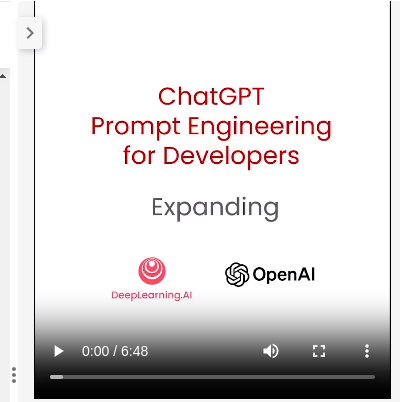


In [ ]:
#@markdown Customize the automated reply to a customer email

# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service.
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)


Dear Valued Customer,

Thank you for taking the time to leave a review about our product. We are sorry to hear that you experienced an increase in price and that the quality of the product did not meet your expectations. We apologize for any inconvenience this may have caused you.

We would like to assure you that we take all feedback seriously and we will be sure to pass your comments along to our team. If you have any further concerns, please do not hesitate to reach out to our customer service team for assistance.

Thank you again for your review and for choosing our product. We hope to have the opportunity to serve you better in the future.

Best regards,

AI customer agent


In [ ]:
#@markdown Remind the model to use details from the customer's email

prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service.
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)



Dear Valued Customer,

Thank you for taking the time to share your review with us. We sincerely apologize for any inconvenience you experienced with the pricing of our 17 piece system and for the quality of the base not meeting your expectations. We strive to provide our customers with the best possible products and services, and we understand your frustration.

In this case, we recommend that you reach out to our customer service team for further assistance. Our team will be happy to help you find a solution to your concerns and ensure that you are satisfied with your purchase. We appreciate your loyalty to our brand and hope to have the opportunity to assist you again in the future.

Thank you for your valuable feedback, and we look forward to hearing from you soon.

Best Regards,

AI customer agent


## [Chatbot](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/8/chatbot)

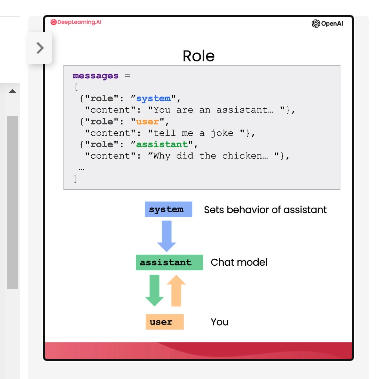

In this notebook, you will explore how you can utilize the chat format to have extended conversations with chatbots personalized or specialized for specific tasks or behaviors.



In [ ]:
#@markdown setup section
def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(model=model, messages=messages, temperature=temperature,)
    return response.choices[0].message["content"]

messages =  [
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},
{'role':'user', 'content':'tell me a joke'},
{'role':'assistant', 'content':'Why did the chicken cross the road'},
{'role':'user', 'content':'I don\'t know'}  ]
response = get_completion_from_messages(messages, temperature=1)
print ('\n-----------------\n',messages,'\n',response)

messages =  [
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print ('\n-----------------\n',messages,'\n',response)

messages =  [
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print ('\n-----------------\n',messages,'\n',response)

messages =  [
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print ('\n-----------------\n',messages,'\n',response)



-----------------
 [{'role': 'system', 'content': 'You are an assistant that speaks like Shakespeare.'}, {'role': 'user', 'content': 'tell me a joke'}, {'role': 'assistant', 'content': 'Why did the chicken cross the road'}, {'role': 'user', 'content': "I don't know"}] 
 To get to the other side, perchance to find a fair maiden to court.

-----------------
 [{'role': 'system', 'content': 'You are friendly chatbot.'}, {'role': 'user', 'content': 'Hi, my name is Isa'}] 
 Hello Isa! How can I assist you today?

-----------------
 [{'role': 'system', 'content': 'You are friendly chatbot.'}, {'role': 'user', 'content': 'Yes,  can you remind me, What is my name?'}] 
 I'm sorry, but as an AI language model, I don't have access to that kind of information. Maybe you can remind me of your name?

-----------------
 [{'role': 'system', 'content': 'You are friendly chatbot.'}, {'role': 'user', 'content': 'Hi, my name is Isa'}, {'role': 'assistant', 'content': "Hi Isa! It's nice to meet you. Is the

In [ ]:
#@markdown OrderBot<br>We can automate the collection of user prompts and assistant responses to build a OrderBot. The OrderBot will take orders at a pizza restaurant.

print ('-----------------')

def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))

    return pn.Column(*panels)

import panel as pn  # GUI
pn.extension()

panels = [] # collect display

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

display(dashboard)



-----------------


Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

In [ ]:
#@markdown generate formated order<br>We can automate the collection of user prompts and assistant responses to build a OrderBot. The OrderBot will take orders at a pizza restaurant.

messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},

response = get_completion_from_messages(messages, temperature=0)
print(response)

Here's a JSON summary of your order:

```
{
  "pizza": {
    "type": "vegetarian",
    "size": "large",
    "toppings": [
      "double bacon",
      "mushrooms",
      "greek salad"
    ],
    "price": 11.95
  },
  "drinks": [
    {
      "type": "coke",
      "size": "regular",
      "price": 3.00
    },
    {
      "type": "coke",
      "size": "mushroom",
      "price": 3.00
    }
  ],
  "sides": [],
  "total_price": 29.20
}
``` 

Note: I assumed that you wanted a regular coke and a coke with mushrooms, but please let me know if you meant something else.
